# Projet MLops

#### Groupe : Lucas - Klervi - Elena - Thomas R
vasseur.corentin@gmail.com

# Mettre dans le requirement.txt

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
################################################

## Import des données

In [3]:
def load_and_describe_data(file_path):
    """
    Charge un fichier CSV et fournit un aperçu général des données.
    :param file_path: Chemin du fichier CSV
    :return: DataFrame Pandas
    """
    df = pd.read_csv(file_path)
    print("Aperçu des premières lignes du jeu de données :")
    print(df.head())

    print("\nInformations générales sur le dataset :")
    print(df.info())

    return df


In [4]:
file_path = "data/revenus.csv"
df = load_and_describe_data(file_path)

Aperçu des premières lignes du jeu de données :
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0         

# Statistiques descriptives

In [7]:

def descriptive_statistics(df):
    """
    Affiche les statistiques descriptives des variables numériques
    et les fréquences/proportions pour chaque variable catégorielle.
    
    :param df: DataFrame Pandas contenant les données à analyser
    """
    # Statistiques descriptives pour les variables numériques
    print("Statistiques descriptives des variables numériques :")
    print(df.describe())
    
    # Compter le nombre de valeurs uniques pour chaque variable catégorielle
    print("\nNombre de valeurs uniques pour chaque variable catégorielle :")
    unique_counts = df.select_dtypes(include=['object']).nunique()
    print(unique_counts)
    
    # Fréquence et proportion des valeurs pour chaque variable catégorielle
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFréquence et proportion des modalités pour la variable '{col}':")
        
        # Calcul des fréquences et des proportions
        value_counts = df[col].value_counts()
        proportions = (value_counts / len(df)) * 100  # Proportion en pourcentage
        
        # Créer un DataFrame pour afficher fréquence et proportion côte à côte
        freq_prop_df = pd.DataFrame({'Fréquence': value_counts, 'Proportion (%)': proportions})
        
        print(freq_prop_df)


In [8]:
descriptive_statistics(df)

Statistiques descriptives des variables numériques :
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.0

## Distribution des variables numériques

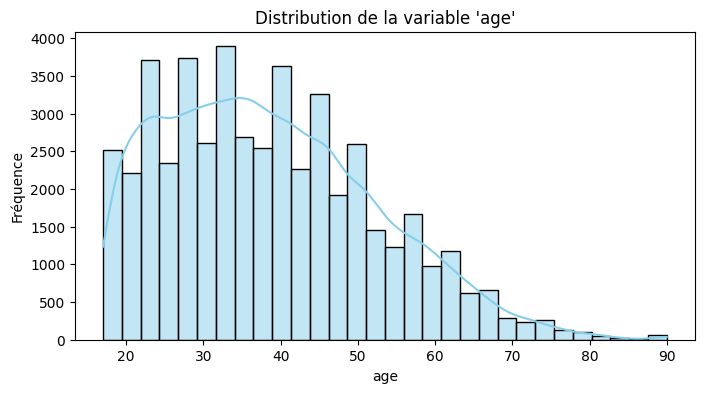

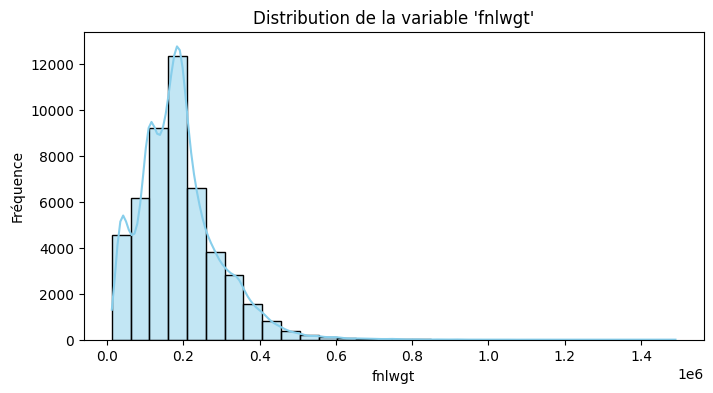

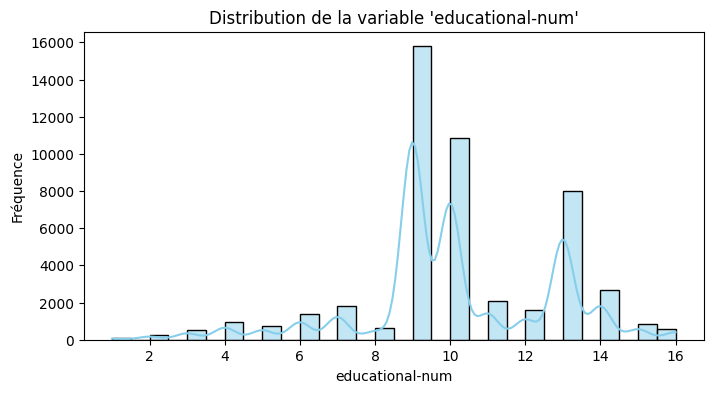

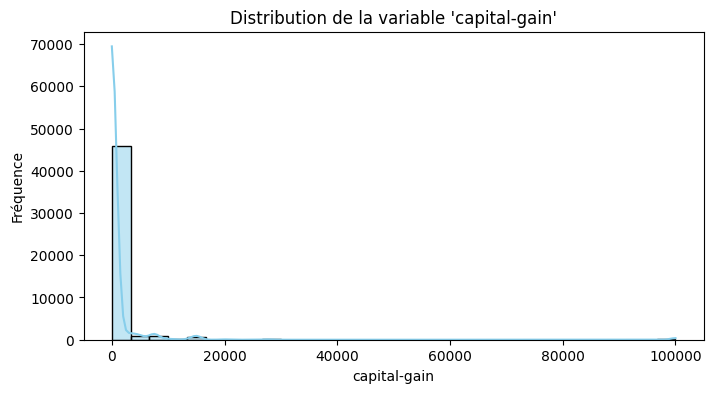

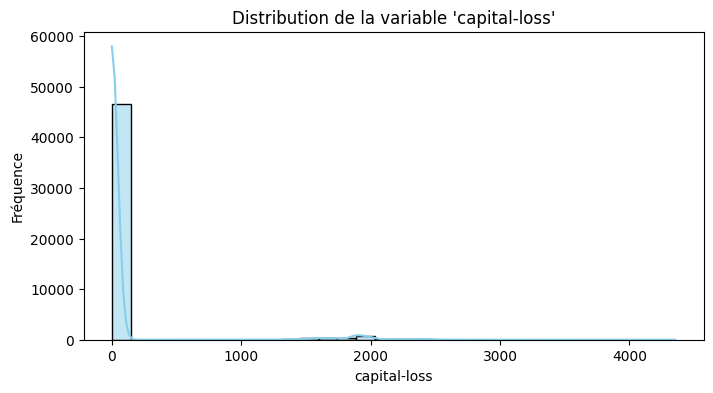

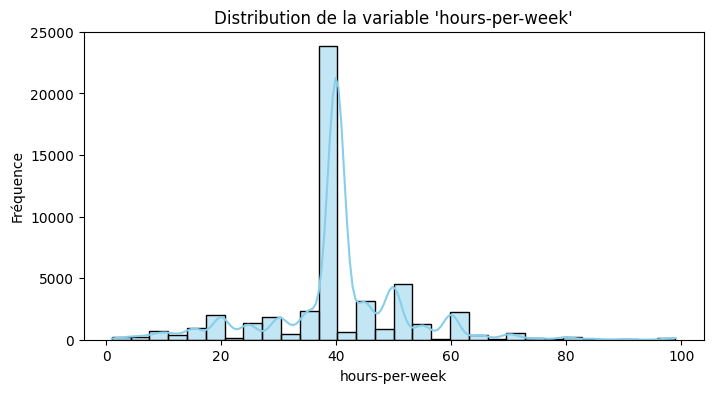

In [10]:
def plot_numerical_distributions(df):
    """
    Affiche des histogrammes pour les variables numériques.
    :param df: DataFrame Pandas
    """
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution de la variable '{col}'")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()

# Exemple d'utilisation
plot_numerical_distributions(df)


## Distribution des valeurs catégorielles

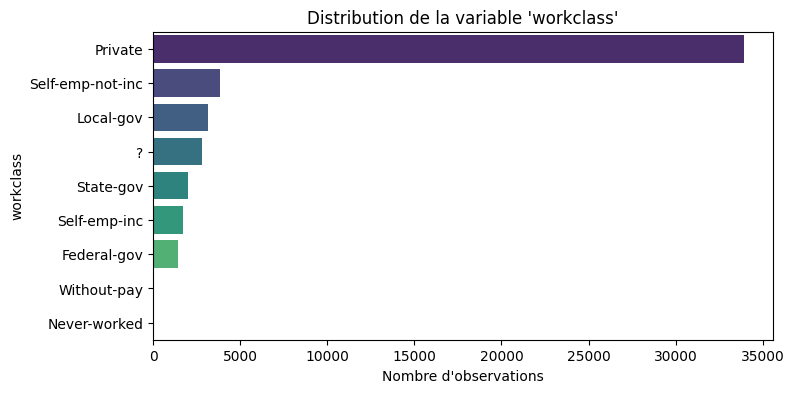

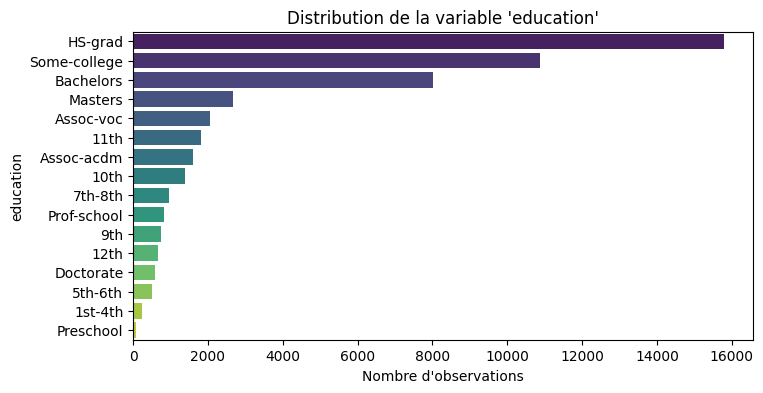

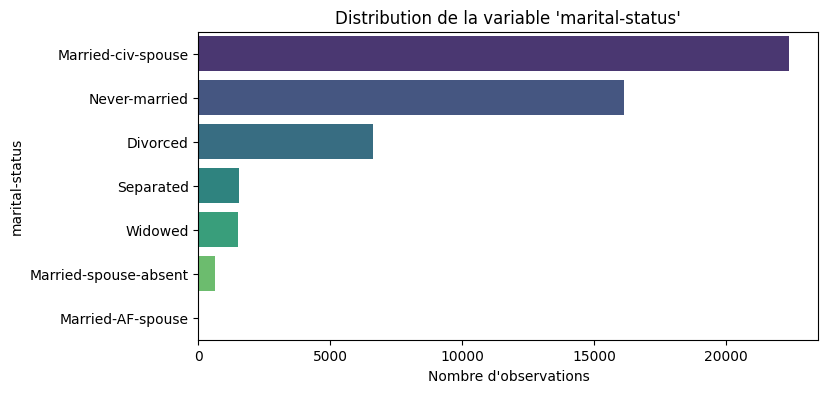

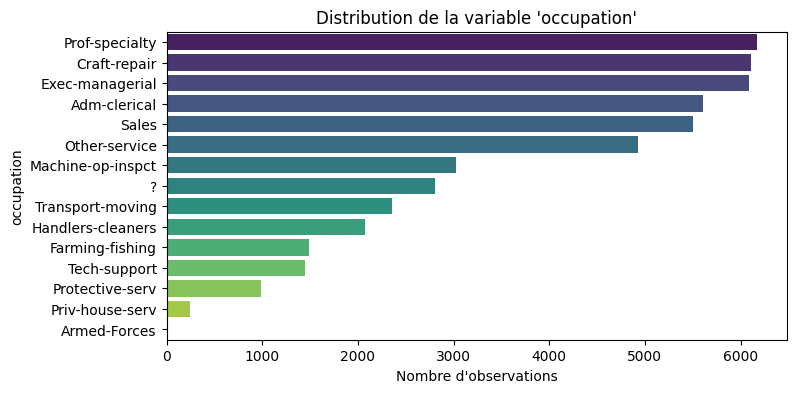

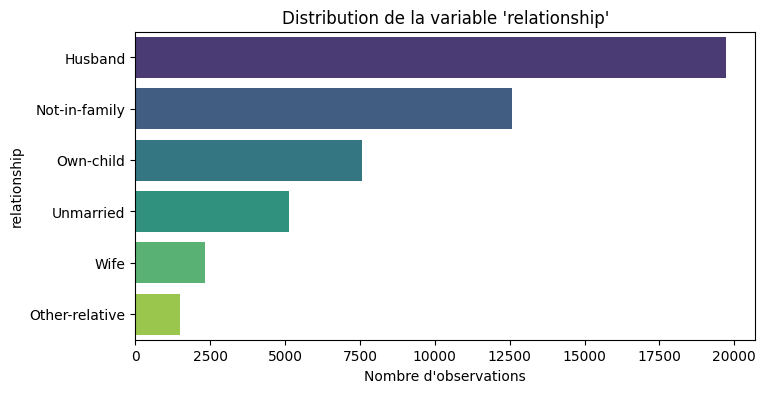

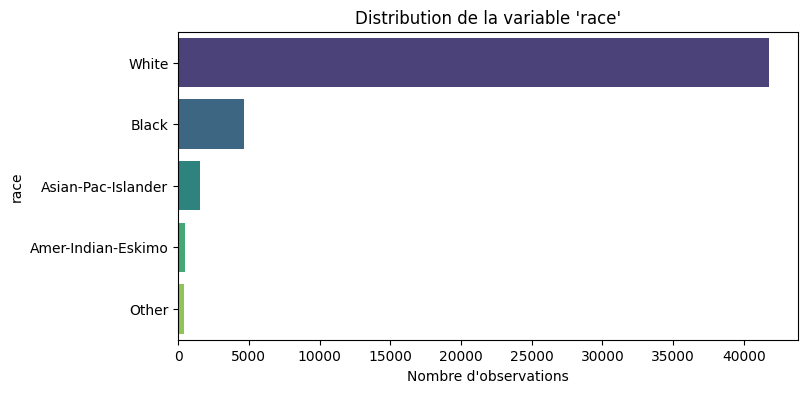

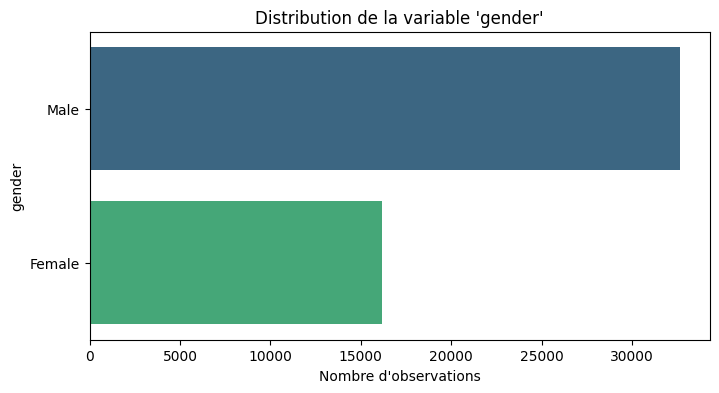

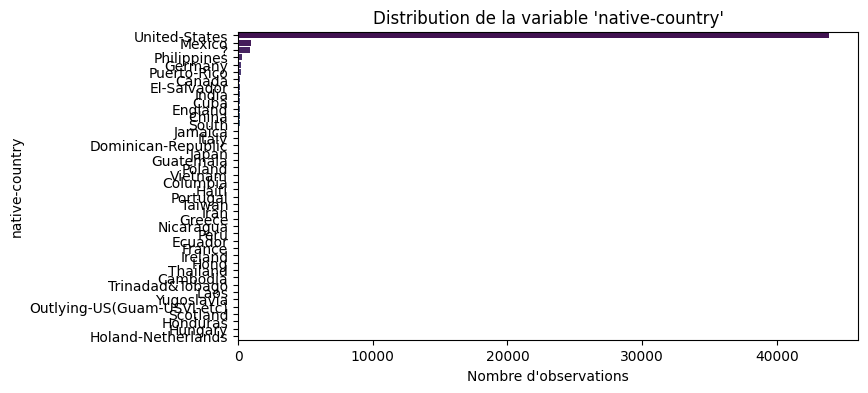

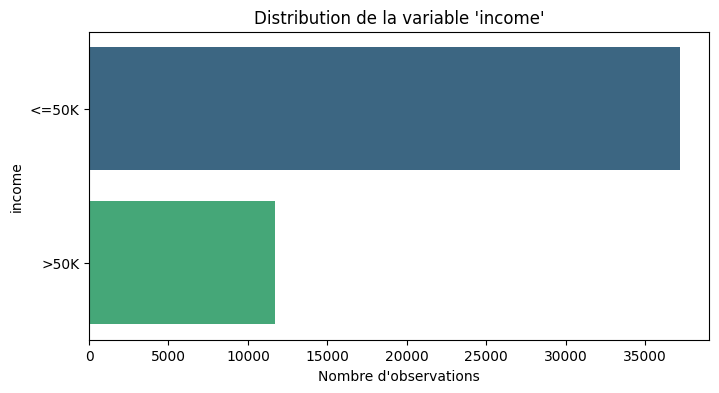

In [11]:
def plot_categorical_distributions(df):
    """
    Affiche des diagrammes en barres pour les variables catégorielles.
    :param df: DataFrame Pandas
    """
    categorical_cols = df.select_dtypes(include='object').columns

    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)
        plt.title(f"Distribution de la variable '{col}'")
        plt.xlabel("Nombre d'observations")
        plt.ylabel(col)
        plt.show()

# Exemple d'utilisation
plot_categorical_distributions(df)


## Matrice de corrélation

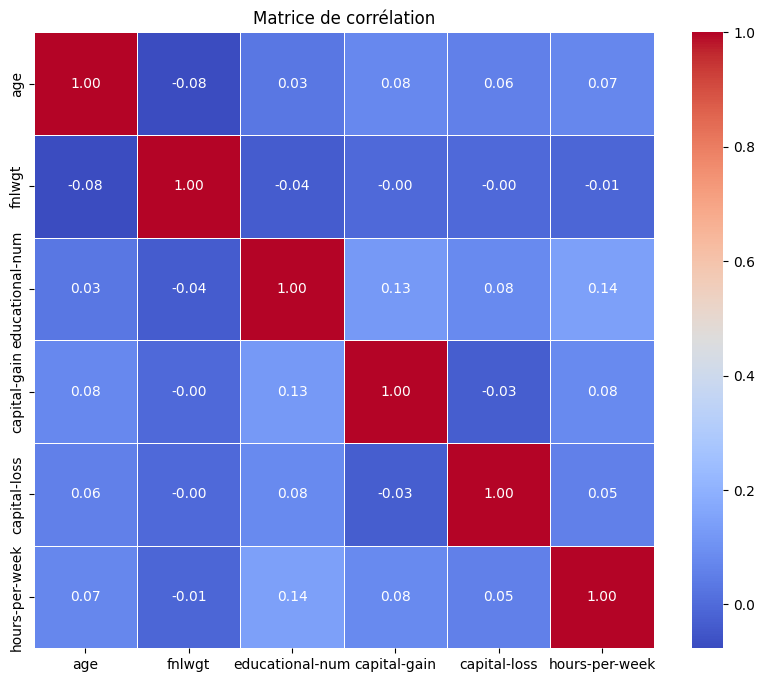

In [12]:
def plot_correlation_matrix(df):
    """
    Affiche la matrice de corrélation pour les variables numériques.
    :param df: DataFrame Pandas
    """
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de corrélation")
    plt.show()

# Exemple d'utilisation
plot_correlation_matrix(df)


On remarque la presence de ? dans le jeu de donnée, on decide de les supprimer.

# Analyse Exploratoire des données

Aperçu des premières lignes du jeu de données :
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0         

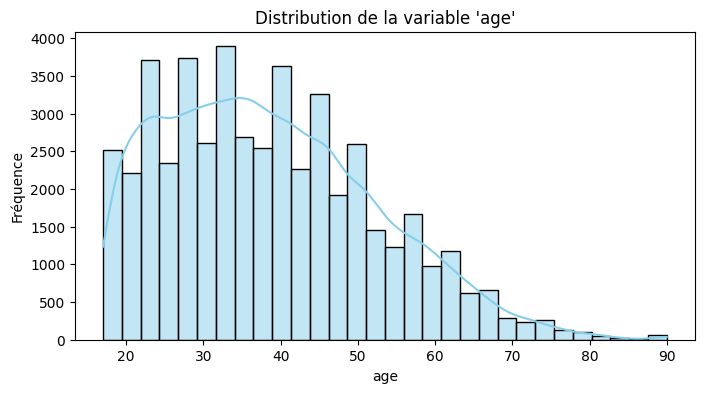

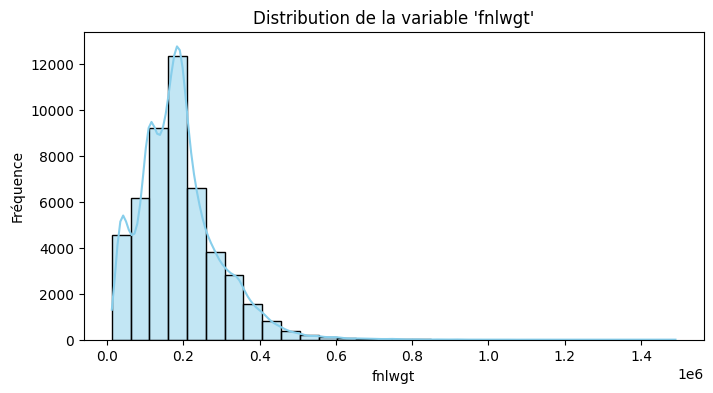

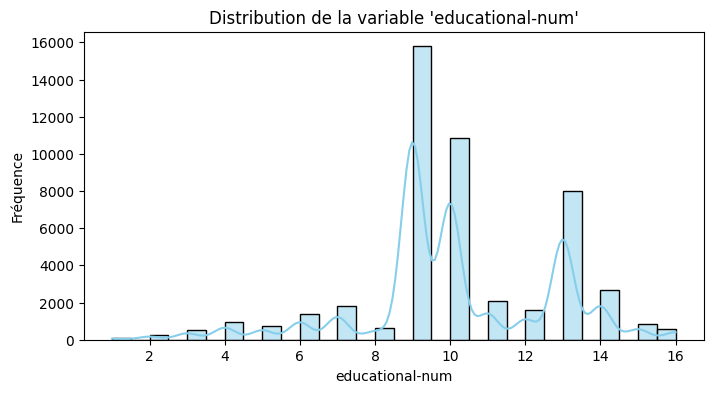

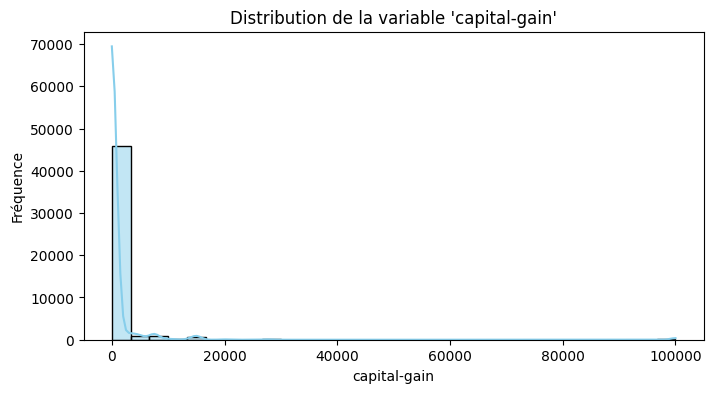

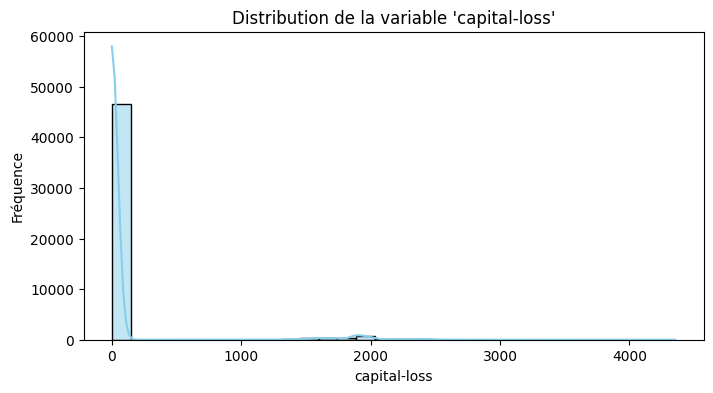

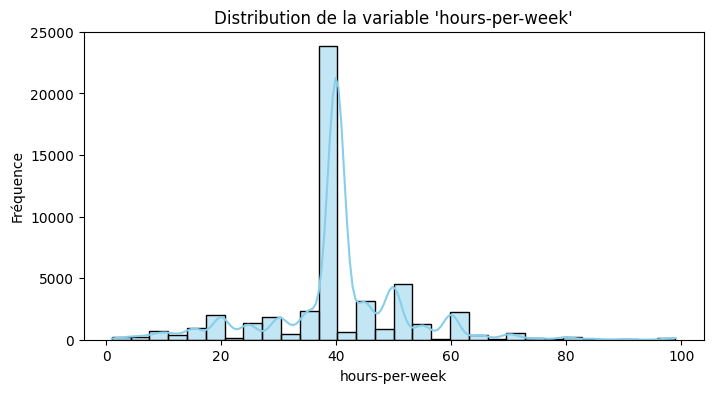

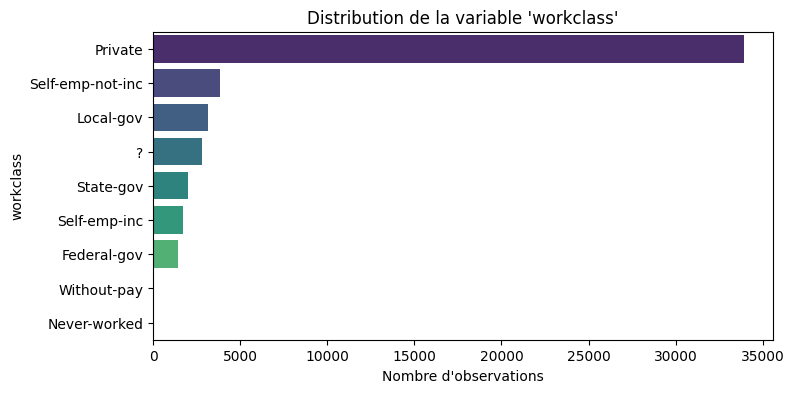

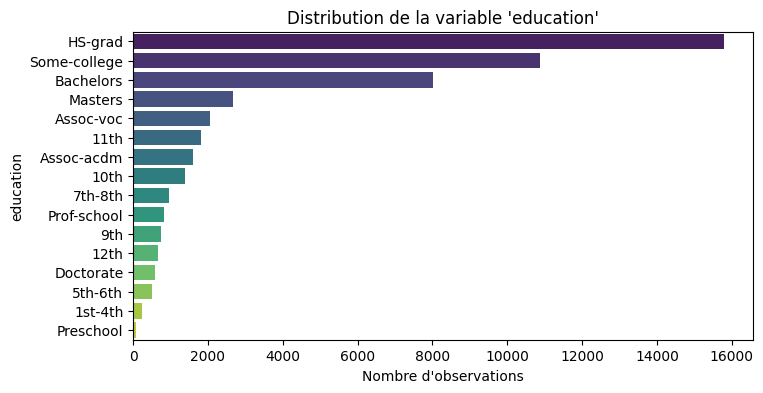

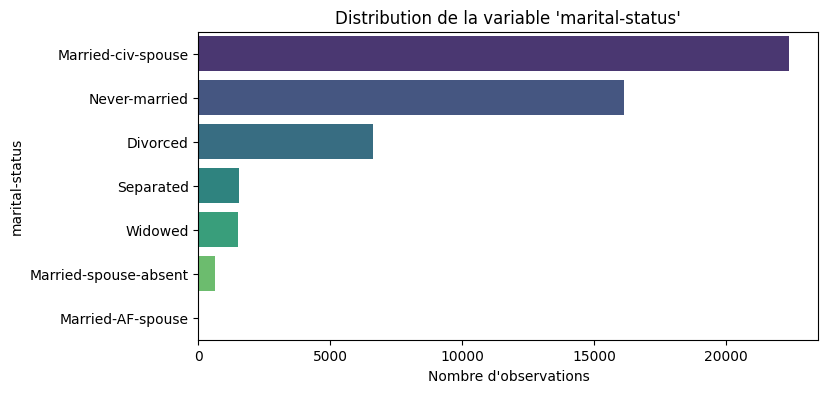

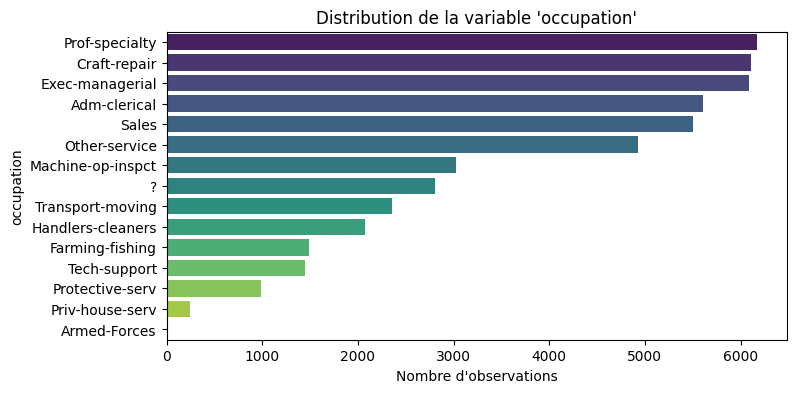

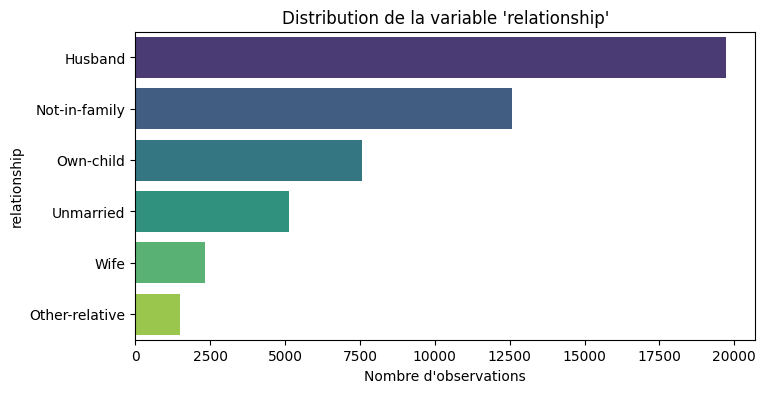

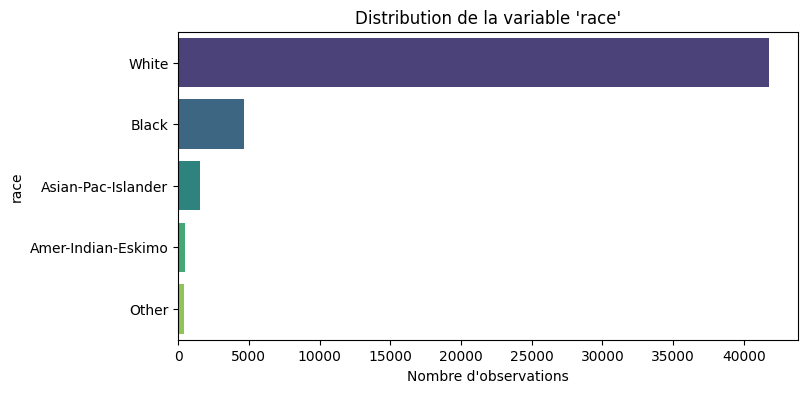

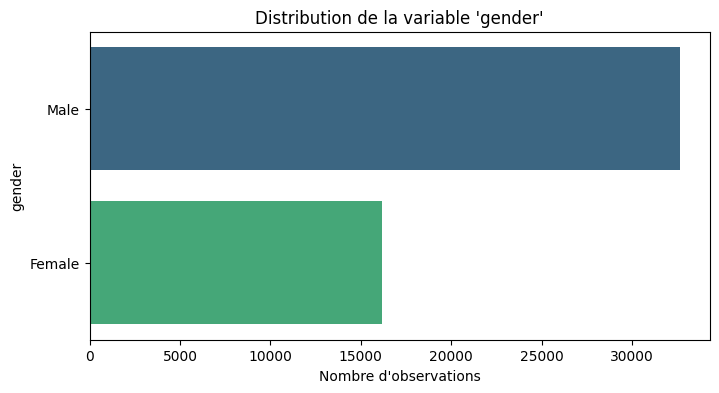

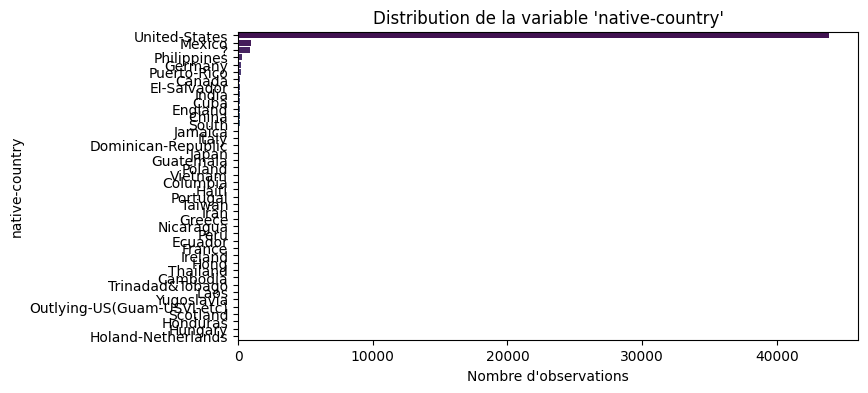

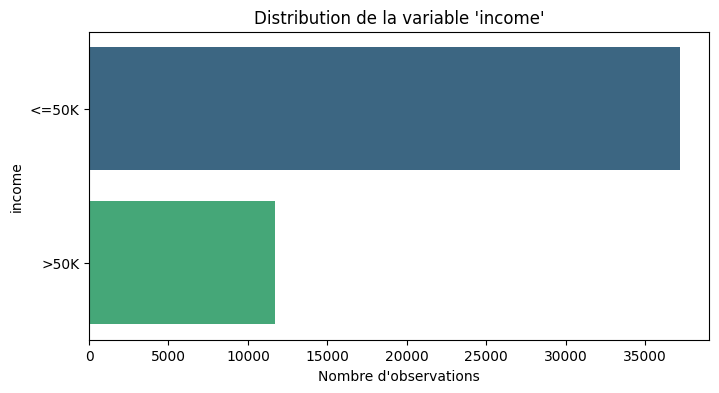

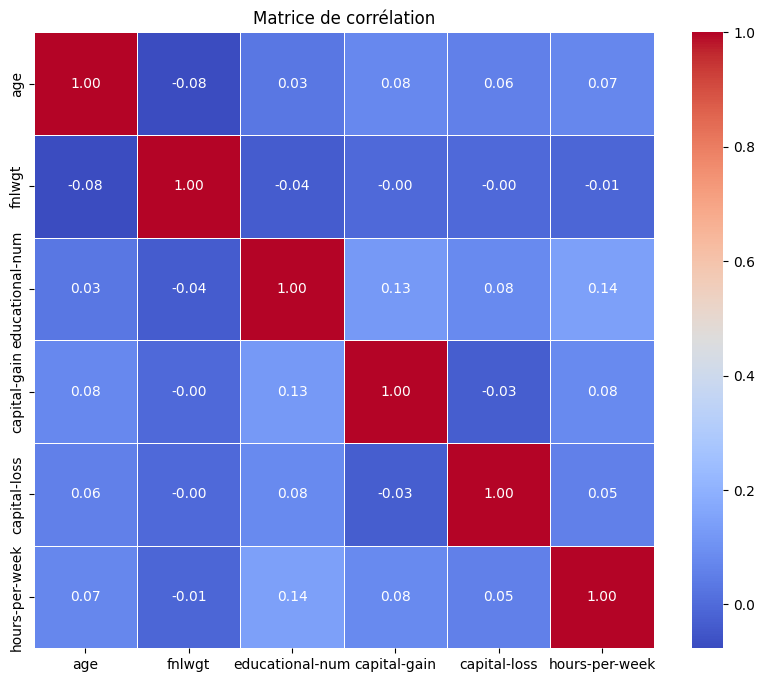

In [14]:
def full_data_analysis(file_path):
    """
    Effectue une analyse complète des données.
    :param file_path: Chemin du fichier CSV
    """
    df = load_and_describe_data(file_path)

    descriptive_statistics(df)
    plot_numerical_distributions(df)
    plot_categorical_distributions(df)
    plot_correlation_matrix(df)

# Exemple d'utilisation
full_data_analysis("data/revenus.csv")


Fonction

In [2]:
# Fonction pour supprimer les "?"

def drop_data(df):
    """
    Supprime les lignes contenant un '?' dans un DataFrame.

    Args:
        df (pd.DataFrame): Le DataFrame à traiter.
    
    Returns:
        pd.DataFrame: Le DataFrame nettoyé sans les lignes contenant '?'.
    """
    # Supprimer les lignes où au moins un élément est '?'
    df_cleaned = df[~df.isin(['?']).any(axis=1)]
    return df_cleaned


In [3]:
df = drop_data(df)

# Recodage des variables

In [4]:
# Fonction de recodage des variables

def numeriser_toutes_colonnes(df):
    """
    Cette fonction numérise plusieurs colonnes spécifiées dans le DataFrame 
    avec des mappings prédéfinis directement dans la fonction.

    :param df: DataFrame contenant les données à numériser
    :return: DataFrame avec les colonnes numérisées
    """
    #Suppression de la variable education : c'est la même que educational num

    if 'education' in df.columns:
        df = df.drop(columns=['education'])
        
    # Mapping pour 'workclass'
    workclass_mapping = {
        'Private': 1,
        'Self-emp-not-inc': 2,
        'Local-gov': 3,
        'State-gov': 4,
        'Self-emp-inc': 5,
        'Federal-gov': 6,
        'Without-pay': 7,
        'Never-worked': 8
    }
    
    # Mapping pour 'marital-status'
    marital_status_mapping = {
        'Never-married': 1,
        'Married-civ-spouse': 2,
        'Widowed': 3,
        'Divorced': 4,
        'Separated': 5,
        'Married-spouse-absent': 6,
        'Married-AF-spouse': 7
    }
    
    # Mapping pour 'occupation'
    occupation_mapping = {
        'Machine-op-inspct': 1,
        'Farming-fishing': 2,
        'Protective-serv': 3,
        'Other-service': 4,
        'Prof-specialty': 5,
        'Craft-repair': 6,
        'Adm-clerical': 7,
        'Exec-managerial': 8,
        'Tech-support': 9,
        'Sales': 10,
        'Priv-house-serv': 11,
        'Transport-moving': 12,
        'Handlers-cleaners': 13,
        'Armed-Forces': 14
    }
    
    # Mapping pour 'relationship'
    relationship_mapping = {
        'Own-child': 1,
        'Husband': 2,
        'Not-in-family': 3,
        'Unmarried': 4,
        'Wife': 5,
        'Other-relative': 6
    }
    
    # Mapping pour 'race'
    race_mapping = {
        'Black': 1,
        'White': 2,
        'Asian-Pac-Islander': 3,
        'Other': 4,
        'Amer-Indian-Eskimo': 5
    }
    
    # Mapping pour 'gender'
    gender_mapping = {
        'Male': 1,
        'Female': 2
    }
    
    # Mapping pour 'native-country'
    native_country_mapping = {
        'United-States': 1,
        'Peru': 2,
        'Guatemala': 3,
        'Mexico': 4,
        'Dominican-Republic': 5,
        'Ireland': 6,
        'Germany': 7,
        'Philippines': 8,
        'Thailand': 9,
        'Haiti': 10,
        'El-Salvador': 11,
        'Puerto-Rico': 12,
        'Vietnam': 13,
        'South': 14,
        'Columbia': 15,
        'Japan': 16,
        'India': 17,
        'Cambodia': 18,
        'Poland': 19,
        'Laos': 20,
        'England': 21,
        'Cuba': 22,
        'Taiwan': 23,
        'Italy': 24,
        'Canada': 25,
        'Portugal': 26,
        'China': 27,
        'Nicaragua': 28,
        'Honduras': 29,
        'Iran': 30,
        'Scotland': 31,
        'Jamaica': 32,
        'Ecuador': 33,
        'Yugoslavia': 34,
        'Hungary': 35,
        'Hong': 36,
        'Greece': 37,
        'Trinadad&Tobago': 38,
        'Outlying-US(Guam-USVI-etc)': 39,
        'France': 40,
        'Holand-Netherlands': 41
    }
    
    # Mapping pour 'income'
    income_mapping = {
        '<=50K': 0,
        '>50K': 1
    }
    
    # List des colonnes à numériser avec leurs mappings
    mappings = {
        'workclass': workclass_mapping,
        'marital-status': marital_status_mapping,
        'occupation': occupation_mapping,
        'relationship': relationship_mapping,
        'race': race_mapping,
        'gender': gender_mapping,
        'native-country': native_country_mapping,
        'income': income_mapping
    }

    # Suppression des espaces dans les colonnes concernées
    cols_to_strip = ['workclass', 'occupation', 'native-country']
    for col in cols_to_strip:
        df[col] = df[col].str.strip()

    # Appliquer les mappings de numérisation à chaque colonne
    for col, mapping in mappings.items():
        df[col] = df[col].replace(mapping)
    
    return df

In [5]:
# Exemple d'application avec un DataFrame "rev1"
df = numeriser_toutes_colonnes(df)

# Affichage du DataFrame après transformation
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,7,1,1,1,1,1,0,0,40,1,0
1,38,1,89814,9,2,2,2,2,1,0,0,50,1,0
2,28,3,336951,12,2,3,2,2,1,0,0,40,1,1
3,44,1,160323,10,2,1,2,1,1,7688,0,40,1,1
5,34,1,198693,6,1,4,3,2,1,0,0,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,1,257302,12,2,9,5,2,2,0,0,38,1,0
48838,40,1,154374,9,2,1,2,2,1,0,0,40,1,1
48839,58,1,151910,9,3,7,4,2,2,0,0,40,1,0
48840,22,1,201490,9,1,7,1,2,1,0,0,20,1,0
